In [152]:
from math import comb

import numpy as np
import altair as alt
import polars as pl
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [149]:

temp_coords_5 = [
    (0, 20),
    (6, 15),
    (12, 30),
    (18, 15),
    (23.98, 20),
]
temp_coords_3 = [
    (0, 20),
    (6, 19),
    (12, 50),
    (18, 19),
    (23.98, 20),
]
bx, by = zip(*temp_coords_5)
bx

(0, 6, 12, 18, 23.98)

In [147]:
np.array(bx)

array([ 0.  ,  6.  , 12.  ,  6.  , 23.98])

In [151]:
cs = CubicSpline(np.array(bx), np.array(by))


In [159]:
xs = np.arange(0, 24, 0.1)
xs

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

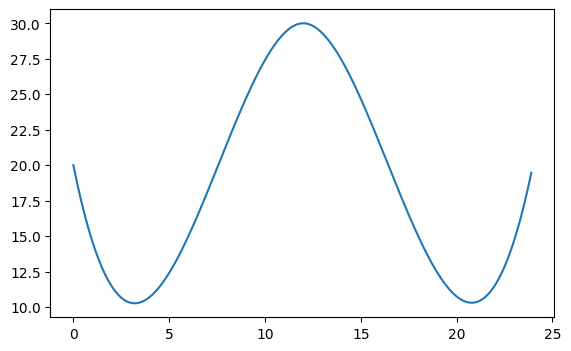

In [160]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(xs, cs(xs), label="S")

In [161]:
cs.c

array([[-5.78961532e-02, -5.78961532e-02,  5.79992846e-02,
         5.79992846e-02],
       [ 1.31990854e+00,  2.77777778e-01, -7.64352980e-01,
         2.79634143e-01],
       [-6.66852303e+00,  2.91759485e+00, -1.85636495e-03,
        -2.91016939e+00],
       [ 2.00000000e+01,  1.50000000e+01,  3.00000000e+01,
         1.50000000e+01]])

In [118]:
def general_bezier(t:float, Bs:list[float]):
    # we have n+1 control points.. 
    # and range function goes to n-1
    n = len(Bs) - 1
    def inner_eq(i):
        return comb(n,i) * (1-t)**(n-i) * t**i * Bs[i]
    return sum(inner_eq(i) for i in range(n+1))

In [119]:
def eq(t, b1, b2):
        return (1-t)*b1 + t*b2

bxs = [1,2]
for t in np.arange(step=0.1, stop=1):
    res = eq(t, *bxs)
    gen = general_bezier(t, bxs)
    assert res == gen
    print(f"{t:.2}: [{res:.2}, {gen:.2}]")

0.0: [1.0, 1.0]
0.1: [1.1, 1.1]
0.2: [1.2, 1.2]
0.3: [1.3, 1.3]
0.4: [1.4, 1.4]
0.5: [1.5, 1.5]
0.6: [1.6, 1.6]
0.7: [1.7, 1.7]
0.8: [1.8, 1.8]
0.9: [1.9, 1.9]


In [85]:
general_bezier(.9, [1,2])

0.36999999999999994

In [150]:
time = np.arange(start=0., step=0.01, stop=1.)
data = pl.DataFrame({'t': time})
coords = temp_coords_5
bx, by = zip(*coords)

alt.Chart(data).mark_line().encode(
    x='x:Q',
    y=alt.Y('y:Q').scale(zero=False),
    order='t:Q'
).transform_calculate(
    x=general_bezier(alt.datum.t, bx),
    y=general_bezier(alt.datum.t, by)
)

alt.Chart(...)

In [88]:
# coords = [(1,1), (9,3), (2,2)]
def eq(t, b1, b2):
        return (1-t)*b1 + t*b2


alt.Chart(data).mark_line().encode(
    x='x:Q',
    y='y:Q',
    order='t:Q'
).transform_calculate(
    x=eq(alt.datum.t, *bx),
    y=eq(alt.datum.t, *by)
)

alt.Chart(...)